In [1]:
import torch
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

from utils import prepare_cifar10_data, train_model, evaluate_model
from models import VAE, compute_loss_vae

In [2]:
batch_size = 64
learning_rate = 1e-3
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

writer = SummaryWriter(log_dir=f'runs/VAE')

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])])

In [3]:
train_loader, val_loader, test_loader = prepare_cifar10_data(transform, batch_size)

vae_model = VAE().to(device)
optimizer = optim.Adam(vae_model.parameters(), lr=learning_rate)

trained_model = train_model(
    writer=writer,
    model=vae_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    compute_loss=compute_loss_vae,
    num_epochs=num_epochs,
    device=device
)

Epoch 1/20
train Loss: 2021.3757
val Loss: 1619.1398
Epoch 2/20
train Loss: 1566.7170
val Loss: 1491.4887
Epoch 3/20
train Loss: 1484.8393
val Loss: 1440.4260
Epoch 4/20
train Loss: 1445.3146
val Loss: 1416.2288
Epoch 5/20
train Loss: 1422.6692
val Loss: 1399.8615
Epoch 6/20
train Loss: 1408.1452
val Loss: 1382.9328
Epoch 7/20
train Loss: 1397.0844
val Loss: 1376.6748
Epoch 8/20
train Loss: 1389.4518
val Loss: 1370.7955
Epoch 9/20
train Loss: 1382.5215
val Loss: 1365.4534
Epoch 10/20
train Loss: 1377.3596
val Loss: 1358.9436
Epoch 11/20
train Loss: 1373.5675
val Loss: 1357.8410
Epoch 12/20
train Loss: 1369.4624
val Loss: 1350.3750
Epoch 13/20
train Loss: 1366.6674
val Loss: 1351.2472
Epoch 14/20
train Loss: 1364.8990
val Loss: 1348.1820
Epoch 15/20
train Loss: 1363.0927
val Loss: 1347.1413
Epoch 16/20
train Loss: 1361.3823
val Loss: 1348.3807
Epoch 17/20
train Loss: 1360.0848
val Loss: 1344.8367
Epoch 18/20
train Loss: 1358.9585
val Loss: 1345.9304
Epoch 19/20
train Loss: 1357.5105
val

In [4]:
test_loss = evaluate_model(
    writer=writer,
    model=trained_model,
    test_loader=test_loader,
    compute_loss=compute_loss_vae,
    device=device
)

Test Loss: 1354.1688


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1770618..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.5976489].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.351526..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7692488..2.3440151].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2933714..1.908451].


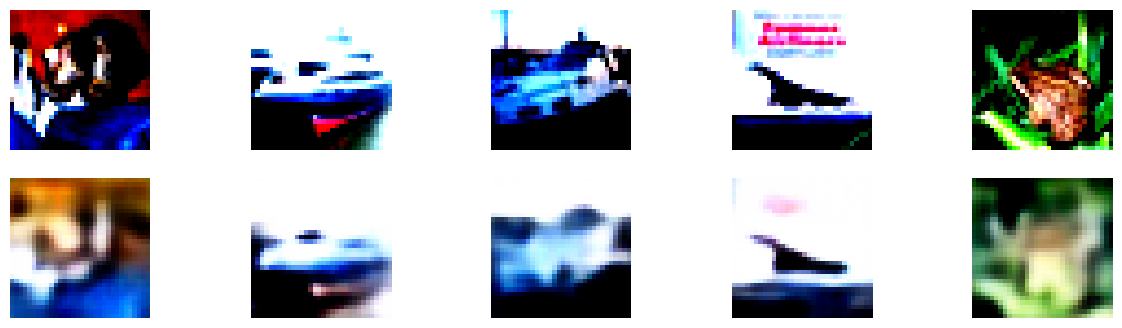

In [5]:
import matplotlib.pyplot as plt 

def show_reconstructed_images(model, test_loader, device, num_images=5):
    model.eval()
    images, _ = next(iter(test_loader))
    images = images.to(device)[:num_images]
    with torch.no_grad():
        outputs, _, _ = model(images)
    images = images.cpu()
    outputs = outputs.cpu()

    fig, axes = plt.subplots(nrows=2, ncols=num_images, sharex=True, sharey=True, figsize=(15, 4))
    for i in range(num_images):
        
        # Original images
        img = images[i]
        img = img.permute(1, 2, 0)
        axes[0, i].imshow(img.numpy())
        axes[0, i].axis('off')
        
        # Reconstructed images
        recon = outputs[i]
        recon = recon * 0.5 + 0.5  # Unnormalize
        recon = recon.permute(1, 2, 0)
        axes[1, i].imshow(recon.numpy())
        axes[1, i].axis('off')
        
    axes[0, 0].set_ylabel('Original')
    axes[1, 0].set_ylabel('Reconstructed')
    plt.show()
    
    
show_reconstructed_images(trained_model, test_loader, device, num_images=5)

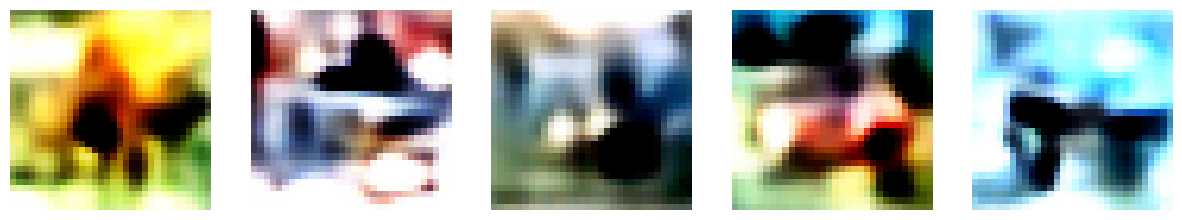

In [6]:
_ = trained_model.generate(device=device)